In [148]:
import pandas as pd

In [149]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [150]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [151]:
type(df)

pandas.core.frame.DataFrame

In [152]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Scatterplot

In [153]:
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='rank', ylabel='salary'>

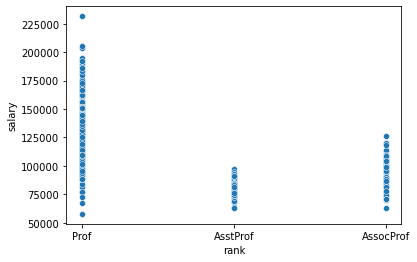

In [154]:
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

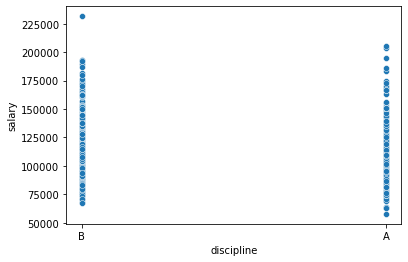

In [155]:
sns.scatterplot(x="discipline",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

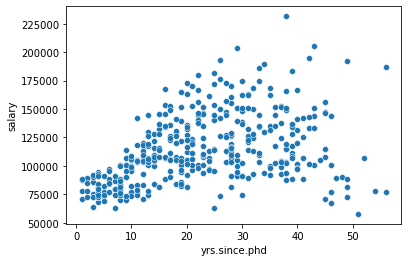

In [156]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

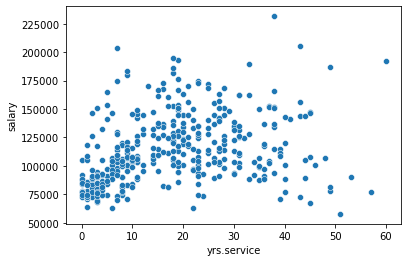

In [157]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

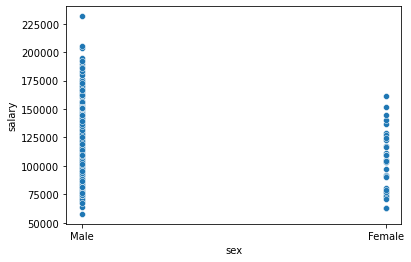

In [158]:
sns.scatterplot(x="sex",y="salary",data=df)

# Correlation

In [159]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [160]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

Correlation using heatmap:

<AxesSubplot:>

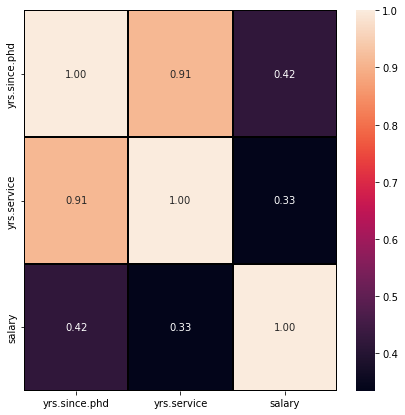

In [161]:
import matplotlib.pyplot as plt
#size of canvas
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.2 , linecolor='black', fmt='.2f')

# Outcome of correlation

All the columns of the datasets is positively correlated with the target column.

1. yrs.since.phd has 42 percent correlation with the target column which can be considered as a good bond and has maximum correlation.
2. yrs.service has 33 percent correlation with the target column which can be considered as a good bond and has the minimum correlation.


# Describing datasets

In [162]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


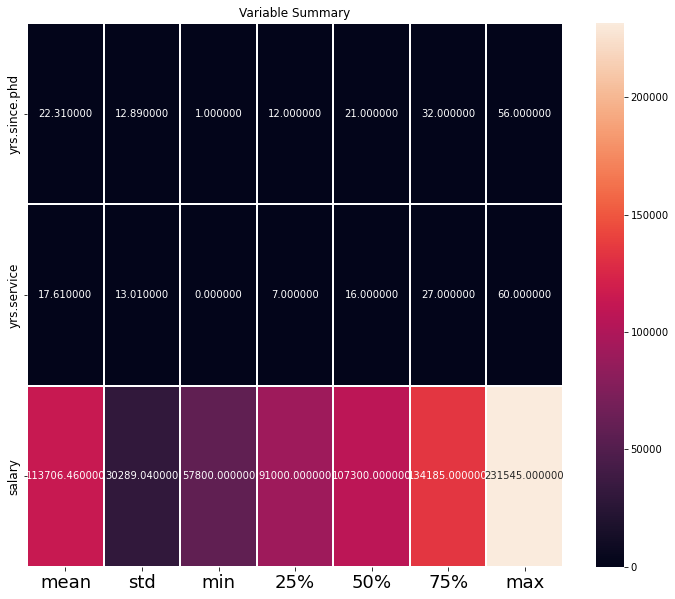

In [163]:
plt.figure(figsize=(12,10))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

# Outcome of described datasets

From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column.

Total number of rows and & columns in the datasets: 397 rows 6 columns

yrs.since.phd

1. Mean=22.310000
2. std=12.890000
3. min_value=1.000000
4. max_value=56.000000


yrs.service

1. Mean=17.610000
2. std=13.010000
3. min_value=0.000000
4. max_value=60.000000

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outliers checking

In [165]:
import warnings
warnings.filterwarnings('ignore')

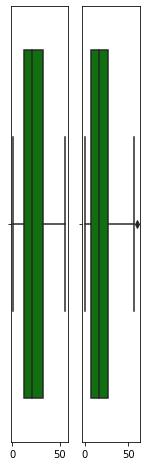

In [166]:
collist=['yrs.since.phd','yrs.service']
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]].values,color='green')
    plt.tight_layout()

# Skewness

In [167]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Normal distribution curve

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

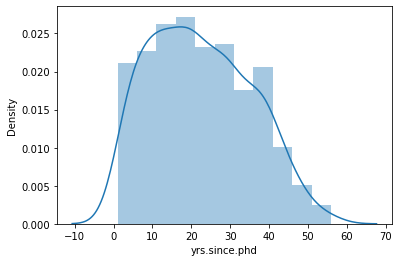

In [168]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

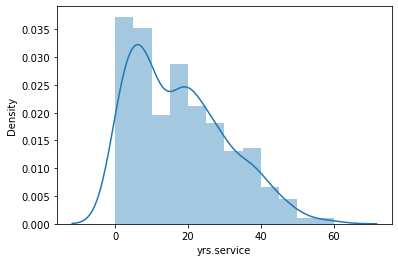

In [169]:
sns.distplot(df["yrs.service"])

# Data cleaning

In [170]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

# Removing Outliers

In [171]:
print(df.corr().dtypes)

yrs.since.phd    float64
yrs.service      float64
salary           float64
dtype: object


In [172]:
df['yrs.since.phd']=df['yrs.since.phd'].astype(int)

In [173]:
df['yrs.service']=df['yrs.service'].astype(int)

In [174]:
df['salary']= df['yrs.since.phd'] - df['yrs.service']

In [175]:
print(df)

         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male       1
1        Prof          B             20           16  Male       4
2    AsstProf          B              4            3  Male       1
3        Prof          B             45           39  Male       6
4        Prof          B             40           41  Male      -1
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male       3
393      Prof          A             31           19  Male      12
394      Prof          A             42           25  Male      17
395      Prof          A             25           15  Male      10
396  AsstProf          A              8            4  Male       4

[397 rows x 6 columns]


In [176]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df['salary']))
z.shape

(397,)

In [177]:
threshold=3 
print(np.where(z>3))

(array([249, 271, 290, 292, 339], dtype=int64),)


In [178]:
len(np.where(z>3)[0])

5

In [179]:
z.iloc[2]

0.6730511090748345

In [180]:
df_new=df[(z>1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (397, 6)
New Dataframe (77, 6)
total_dropped_rows 320


# Percentage Data loss

In [181]:
loss_percent=(float(397-77)/(397*100))
print(loss_percent,'%')

0.008060453400503778 %


# Mode with outliers is df and model with desired outliers is df_new1

Dividing data in features and vectors

In [182]:
#independent column
x=df_new.iloc[:,:-1]
#target
y=df_new.iloc[:,:-1]
print(x)
print(y)

     rank discipline  yrs.since.phd  yrs.service   sex
4    Prof          B             40           41  Male
16   Prof          B             19           20  Male
18   Prof          A             37           23  Male
25   Prof          A             21            8  Male
26   Prof          A             35           23  Male
..    ...        ...            ...          ...   ...
389  Prof          A             33           18  Male
390  Prof          A             40           19  Male
391  Prof          A             30           19  Male
393  Prof          A             31           19  Male
394  Prof          A             42           25  Male

[77 rows x 5 columns]
     rank discipline  yrs.since.phd  yrs.service   sex
4    Prof          B             40           41  Male
16   Prof          B             19           20  Male
18   Prof          A             37           23  Male
25   Prof          A             21            8  Male
26   Prof          A             35       

# Transforming data to remove skewness

In [183]:
from sklearn.preprocessing import power_transform
x=[[-1.31616039, -0.70710678],[0.20998268, -0.70710678],[1.1061777, 1.41421356]]
n=print(power_transform(x,method='yeo-johnson'))
n

[[-1.25281802 -0.70710678]
 [ 0.05822308 -0.70710678]
 [ 1.19459494  1.41421356]]


In [184]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.31616039, -0.70710678],
       [ 0.20998268, -0.70710678],
       [ 1.1061777 ,  1.41421356]])

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
from sklearn.metrics import accuracy_score


# Splitting the dataframe

In [186]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.5)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lt.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

ValueError: Found input variables with inconsistent numbers of samples: [3, 77]